# 12주차(1) _ 1121

In [3]:
!pip install folium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.3/102.3 kB 5.6 MB/s eta 0:00:00


In [4]:
import numpy as np
import pandas as pd
import folium
import folium.plugins

# folium

`-` ref: [folium](https://python-visualization.github.io/folium/#)

`-`Leaflet.js + Python $\to$ folium

- 데이터전처리: 파이썬이용

- 시각화: Leaflet.js 이용

`-` Leaflet.js 란?

- 지리정보시각화를 위해 개발된 자바스크립트 라이브러리

`-` 이런 패키지특징: 사용방법을 익히기 어렵다.

- 메뉴얼이 정리되어 있지 않음

# folium: 기본지도 그리기

## folium.Map()

`-` global view

In [7]:
folium.Map(scrollWheelZoom=False)

`-` 줌스크롤을 False 시키는 방법: scrollWheelZoom=False

`-` 이 옵션을 확인하려면? (1) 도움말 (2) folium 공식홈페이지 (3) [Leaflet 공식홈페이지](https://leafletjs.com/#map)

In [8]:
folium.Map?

Init signature:
folium.Map(
    location=None,
    width='100%',
    height='100%',
    left='0%',
    top='0%',
    position='relative',
    tiles='OpenStreetMap',
    attr=None,
    min_zoom=0,
    max_zoom=18,
    zoom_start=10,
    min_lat=-90,
    max_lat=90,
    min_lon=-180,
    max_lon=180,
    max_bounds=False,
    crs='EPSG3857',
    control_scale=False,
    prefer_canvas=False,
    no_touch=False,
    disable_3d=False,
    png_enabled=False,
    zoom_control=True,
    **kwargs,
)
Docstring:     
Create a Map with Folium and Leaflet.js

Generate a base map of given width and height with either default
tilesets or a custom tileset URL. The following tilesets are built-in
to Folium. Pass any of the following to the "tiles" keyword:

    - "OpenStreetMap"
    - "Mapbox Bright" (Limited levels of zoom for free tiles)
    - "Mapbox Control Room" (Limited levels of zoom for free tiles)
    - "Stamen" (Terrain, Toner, and Watercolor)
    - "Cloudmade" (Must pass API key)
    - "Mapb

`-` location과 scale을 조정하는 방법

- 35.8475, 127.1305 # 전북대 자연대 본관

- 35.8468, 127.1294 # 전북대 분수대 

In [11]:
folium.Map(scrollWheelZoom=False,
          location = [35.8475, 127.1305],
          zoom_start=20)

In [15]:
folium.Map(scrollWheelZoom=False,
          location = [35.8475, 127.1305], #자연대본관이 센터
          zoom_start=15)

`-`  tiles 옵션을 주어서 지도의 외형을 변경하여 보자.

- tiles="OpenStreetMap"

- tiles="Stamen Terrain", tiles="Stamen Toner", tiles="Stamen Watercolor"

- tiles=`"CartoDB positron"`, tiles="CartoDB dark_matter"

In [20]:
folium.Map(scrollWheelZoom=False,
          location = [35.8475, 127.1305],
          zoom_start=15,
          tiles="Stamen Terrain")

# folium: 기본지도 위에 마커 추가

## folium.Marker()

`-` 마커생성

In [59]:
jbnu = folium.Marker(
    location = [35.8475, 127.1305]
)

folium.Marker 는 클래스

In [60]:
m = folium.Map(scrollWheelZoom=False,
          location = [35.8475, 127.1305],
          zoom_start=14,
          tiles="CartoDB positron")

folium.Map 도 클래스

In [61]:
jbnu.add_to(m)

In [62]:
m

In [63]:
home = folium.Marker(
    location = [35.8368, 127.1118] # 서신동
)

In [64]:
home.add_to(m)

In [65]:
m

### 마커에 팝업내용 추가

In [67]:
m = folium.Map(
    scrollWheelZoom=False,
    location = [35.8475,127.1305], # 자연대본관  
    zoom_start=14,
    tiles="CartoDB positron"
)
jbnu = folium.Marker(
    location = [35.8475,127.1305], # 자연대본관  
    popup = "JBNU"
)
home = folium.Marker(
    location = [35.8368, 127.1118], # 서신동
    popup = "HOME",
    tooltip = "클릭해주세요"
)
jbnu.add_to(m)
home.add_to(m)
m

### 마커의 아이콘 변경

`-` folium.Marker()에서 icon=folium.Icon(color='red',icon='university',prefix='fa') 와 같은 식으로 옵션을 추가

- icon=‘university’ 대신에 `street-view’,‘tree’,‘plane’,‘bell’ 등을 추가할 수 있음.

- 아이콘들은 [여기](https://getbootstrap.com/docs/3.3/components/) 참고. ’glyphicon glyphicon-” 부분을 제외한 문자열을 넣으면 된다.

In [70]:
m = folium.Map(
    scrollWheelZoom=False,
    location = [35.8475,127.1305], # 자연대본관  
    zoom_start=14,
    tiles="CartoDB positron"
)
jbnu = folium.Marker(
    location = [35.8475,127.1305], # 자연대본관  
    icon=folium.Icon(color='red',icon='university',prefix='fa'),
    popup = "JBNU"
)
home = folium.Marker(
    location = [35.8368, 127.1118], # 서신동
    popup = "HOME",
    tooltip = "클릭해주세요"
)
jbnu.add_to(m)
home.add_to(m)
m

### 마커의 팝업내용 HTML넣기(1)

`-` "JBNU" 대신에 `"<h2> JBNU </h2><br>"`

`-` "HOME" 대신에 `"<h5> HOME </h5><br>"`

In [69]:
m = folium.Map(
    scrollWheelZoom=False,
    location = [35.8475,127.1305], # 자연대본관  
    zoom_start=14,
    tiles="CartoDB positron"
)
jbnu = folium.Marker(
    location = [35.8475,127.1305], # 자연대본관  
    icon=folium.Icon(color='red',icon='university',prefix='fa'),
    popup = "<h2> JBNU </h2><br>"
)
home = folium.Marker(
    location = [35.8368, 127.1118], # 서신동
    popup = "<h5> HOME </h5><br>",
    tooltip = "클릭해주세요"
)
jbnu.add_to(m)
home.add_to(m)
m

### 마커의 팝업내용 HTML넣기(2)

- 데이터프레임을 HTML로 바꾸어서 넣기

In [72]:
_df=pd.DataFrame({'year':[2019,2020,2021,2022],'students':[35,30,33,26]})
_df

year  students
0  2019        35
1  2020        30
2  2021        33
3  2022        26

In [74]:
_df.to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>year</th>\n      <th>students</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>2019</td>\n      <td>35</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>2020</td>\n      <td>30</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>2021</td>\n      <td>33</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>2022</td>\n      <td>26</td>\n    </tr>\n  </tbody>\n</table>'

In [76]:
m = folium.Map(
    scrollWheelZoom=False,
    location = [35.8475,127.1305], # 자연대본관  
    zoom_start=14,
    tiles="CartoDB positron"
)
jbnu = folium.Marker(
    location = [35.8475,127.1305], # 자연대본관  
    icon=folium.Icon(color='red',icon='university',prefix='fa'),
    popup = _df.to_html()
)
home = folium.Marker(
    location = [35.8368, 127.1118], # 서신동
    popup = "<h5> HOME </h5><br>" + _df.to_html(),
    tooltip = "클릭해주세요"
)
jbnu.add_to(m)
home.add_to(m)
m

### 마커의 팝업내용 HTML넣기(3)

- 데이터프레임을 HTML로 바꾸어서 넣어보자.

- 팝업시 크기를 조절할 수 있게 해보자. (folium.IFrame, folium.Popup 이용)

In [77]:
_iframe = folium.IFrame('<h2> JBNU </h2><br>'+_df.to_html(),width=150,height=200)
_popup = folium.Popup(_iframe)

In [78]:
m = folium.Map(
    scrollWheelZoom=False,
    location = [35.8475,127.1305], # 자연대본관  
    zoom_start=14,
    tiles="CartoDB positron"
)
jbnu = folium.Marker(
    location = [35.8475,127.1305], # 자연대본관  
    icon=folium.Icon(color='red',icon='university',prefix='fa'),
    popup = _popup
)
home = folium.Marker(
    location = [35.8368, 127.1118], # 집 
    popup = "<h5> HOME </h5><br>",
    tooltip = "클릭해주세요"
)
jbnu.add_to(m)
home.add_to(m)
m

### 마커의 팝업내용 HTML넣기(4)

- 논리구조상 HTML 오브젝트를 아무거나 넣을 수 있음 $\to$ 그림도 넣을 수 있을까?

- 그림파일을 HTML로 바꾸어서 넣어보자.

In [80]:
import matplotlib.pyplot as plt

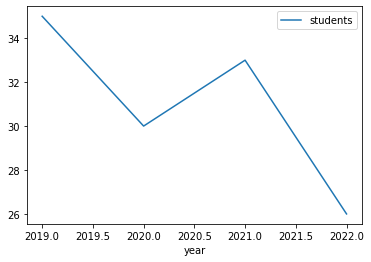

In [81]:
_df.plot.line(x='year',y='students')
fig = plt.gcf()

In [83]:
fig.savefig?

Signature: fig.savefig(fname, *, transparent=None, **kwargs)
Docstring:
Save the current figure.

Call signature::

  savefig(fname, *, dpi='figure', format=None, metadata=None,
          bbox_inches=None, pad_inches=0.1,
          facecolor='auto', edgecolor='auto',
          backend=None, **kwargs
         )

The available output formats depend on the backend being used.

Parameters
----------
fname : str or path-like or binary file-like
    A path, or a Python file-like object, or
    possibly some backend-dependent object such as
    `matplotlib.backends.backend_pdf.PdfPages`.

    If *format* is set, it determines the output format, and the file
    is saved as *fname*.  Note that *fname* is used verbatim, and there
    is no attempt to make the extension, if any, of *fname* match
    *format*, and no extension is appended.

    If *format* is not set, then the format is inferred from the
    extension of *fname*, if there is one.  If *format* is not
    set and *fname* has no ext

In [84]:
fig.savefig('test.png')

- 저장한 그림파일을 HTML로 바꾸기 위해서 base64 가져오기

In [85]:
import base64

In [86]:
_encoded = base64.b64encode(open('test.png','rb').read())
_myhtml = '<img src="data:image/png;base64,{}">'.format
_iframe = folium.IFrame(_myhtml(_encoded.decode('UTF-8')),width=400,height=300)
_popup = folium.Popup(_iframe)

In [87]:
m = folium.Map(
    scrollWheelZoom=False,
    location = [35.8475,127.1305], # 자연대본관  
    zoom_start=14,
    tiles="CartoDB positron"
)
jbnu = folium.Marker(
    location = [35.8475,127.1305], # 자연대본관  
    icon=folium.Icon(color='red',icon='university',prefix='fa'),
    popup = _popup
)
home = folium.Marker(
    location = [35.8368, 127.1118], # 집 
    popup = "<h5> HOME </h5><br>",
    tooltip = "클릭해주세요"
)
jbnu.add_to(m)
home.add_to(m)
m

## folium.CircleMarker()

`-` 서클마커 생성

In [90]:
folium.CircleMarker?

Init signature:
folium.CircleMarker(
    location=None,
    radius=10,
    popup=None,
    tooltip=None,
    **kwargs,
)
Docstring:     
A circle of a fixed size with radius specified in pixels.

See :func:`folium.vector_layers.path_options` for the `Path` options.

Parameters
----------
location: tuple[float, float]
    Latitude and Longitude pair (Northing, Easting)
popup: string or folium.Popup, default None
    Input text or visualization for object displayed when clicking.
tooltip: str or folium.Tooltip, default None
    Display a text when hovering over the object.
radius: float, default 10
    Radius of the circle marker, in pixels.
**kwargs
    Other valid (possibly inherited) options. See:
    https://leafletjs.com/reference.html#circlemarker
File:           ~/anaconda3/envs/py37/lib/python3.7/site-packages/folium/vector_layers.py
Type:           type
Subclasses:     


In [88]:
m = folium.Map(
    scrollWheelZoom=False,
    location = [35.8475,127.1305], # 자연대본관  
    zoom_start=14,
    tiles="CartoDB positron"
)
jbnu = folium.CircleMarker(
    location = [35.8475,127.1305], 
    popup = "JBNU"
)
jbnu.add_to(m)
m

### 서클마커의 색상 및 크기 변경

In [91]:
m = folium.Map(
    scrollWheelZoom=False,
    location = [35.8475,127.1305], # 자연대본관  
    zoom_start=14,
    tiles="CartoDB positron"
)
jbnu = folium.CircleMarker(
    location = [35.8475,127.1305], 
    popup = "JBNU",
    radius = 20,
    color='red'
)
jbnu.add_to(m)
m

### 서클마커 테두리 삭제 및 fill

In [92]:
m = folium.Map(
    scrollWheelZoom=False,
    location = [35.8475,127.1305], # 자연대본관  
    zoom_start=14,
    tiles="CartoDB positron"
)
jbnu = folium.CircleMarker(
    location = [35.8475,127.1305], 
    popup = "JBNU",
    radius = 20,
    color=None,
    fill=True,
    fill_color='blue'
)
jbnu.add_to(m)
m

# folium: heatmap

## folium.plugins.HeatMap()

`-` Heatmap은 폴리움에서 데이터 시각화를 하기에 적합한 기본도구임

hetmap : 변수가 nx3(or2)의 형태로 저장되어야함. 위치정보, 색깔

In [98]:
data = np.random.multivariate_normal(mean=[28,77],cov=[[5,0],[0,5]],size=30)
data

array([[26.90395013, 76.67048321],
       [25.8497742 , 78.11586853],
       [25.9457691 , 76.38304552],
       [26.92593912, 77.28038385],
       [25.5991387 , 73.78185956],
       [27.3230456 , 81.43696204],
       [29.148638  , 77.10700642],
       [30.67602261, 77.54824301],
       [28.54287701, 75.90813103],
       [27.58172922, 74.17403175],
       [30.49801026, 75.01214148],
       [29.13382765, 79.22643318],
       [28.01915992, 77.16029599],
       [26.77686428, 72.68952163],
       [26.75485743, 73.9484101 ],
       [23.98161607, 70.57320764],
       [28.34373122, 76.12772879],
       [27.59842471, 79.05475651],
       [30.44317469, 74.30593407],
       [30.37148679, 77.59831078],
       [30.85907885, 79.21582417],
       [27.09252368, 78.40493264],
       [32.42220863, 76.50265661],
       [25.28967556, 79.93875523],
       [25.23525815, 75.94602496],
       [29.14062166, 76.81364822],
       [26.4371104 , 78.74836501],
       [24.8546951 , 76.4959588 ],
       [29.65245395,

In [99]:
folium.plugins.HeatMap?

Init signature:
folium.plugins.HeatMap(
    data,
    name=None,
    min_opacity=0.5,
    max_zoom=18,
    radius=25,
    blur=15,
    gradient=None,
    overlay=True,
    control=True,
    show=True,
    **kwargs,
)
Docstring:     
Create a Heatmap layer

Parameters
----------
data : list of points of the form [lat, lng] or [lat, lng, weight]
    The points you want to plot.
    You can also provide a numpy.array of shape (n,2) or (n,3).
name : string, default None
    The name of the Layer, as it will appear in LayerControls.
min_opacity  : default 1.
    The minimum opacity the heat will start at.
max_zoom : default 18
    Zoom level where the points reach maximum intensity (as intensity
    scales with zoom), equals maxZoom of the map by default
radius : int, default 25
    Radius of each "point" of the heatmap
blur : int, default 15
    Amount of blur
gradient : dict, default None
    Color gradient config. e.g. {0.4: 'blue', 0.65: 'lime', 1: 'red'}
overlay : bool, default True
  

In [101]:
folium.plugins.HeatMap(data)

In [102]:
m = folium.Map(
    scrollWheelZoom=False,
    location = [28,77],
    zoom_start=5
)
folium.plugins.HeatMap(data).add_to(m)
m

In [107]:
m = folium.Map(
    scrollWheelZoom=False,
    location = [28,77],
    zoom_start=5
)
folium.plugins.HeatMap(data,
    radius=11
).add_to(m)
m

# folium: heatmap animation

## folium.plugins.HeatMapWithTime()

In [108]:
data1 = np.random.multivariate_normal(mean=[28,77],cov=[[5,0],[0,5]],size=20)
data2 = np.random.multivariate_normal(mean=[25,80],cov=[[5,0],[0,5]],size=20)
data3 = np.random.multivariate_normal(mean=[31,70],cov=[[5,0],[0,5]],size=20)
data = np.array([data1,data2,data3])

In [109]:
m = folium.Map(
    scrollWheelZoom=False,
    location = [28,77],
    zoom_start=5
)
folium.plugins.HeatMapWithTime(
    data.tolist(),
    index=['t1','t2','t3'], # time_index 
    radius=15,
).add_to(m)
m

## 예제: earthquakes

### Step1: Pandas 정리

In [110]:
df=pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/earthquakes-23k.csv')
df

Date  Latitude  Longitude  Magnitude
0      01/02/1965   19.2460   145.6160        6.0
1      01/04/1965    1.8630   127.3520        5.8
2      01/05/1965  -20.5790  -173.9720        6.2
3      01/08/1965  -59.0760   -23.5570        5.8
4      01/09/1965   11.9380   126.4270        5.8
...           ...       ...        ...        ...
23407  12/28/2016   38.3917  -118.8941        5.6
23408  12/28/2016   38.3777  -118.8957        5.5
23409  12/28/2016   36.9179   140.4262        5.9
23410  12/29/2016   -9.0283   118.6639        6.3
23411  12/30/2016   37.3973   141.4103        5.5

[23412 rows x 4 columns]

In [112]:
df.Date

0        01/02/1965
1        01/04/1965
2        01/05/1965
3        01/08/1965
4        01/09/1965
            ...    
23407    12/28/2016
23408    12/28/2016
23409    12/28/2016
23410    12/29/2016
23411    12/30/2016
Name: Date, Length: 23412, dtype: object

In [116]:
' 01/02/1965'.split('/')[-1]

'1965'

In [120]:
df.assign(Year = list(map(lambda x: x.split('/')[-1], df.Date)))

Date  Latitude  Longitude  Magnitude  Year
0      01/02/1965   19.2460   145.6160        6.0  1965
1      01/04/1965    1.8630   127.3520        5.8  1965
2      01/05/1965  -20.5790  -173.9720        6.2  1965
3      01/08/1965  -59.0760   -23.5570        5.8  1965
4      01/09/1965   11.9380   126.4270        5.8  1965
...           ...       ...        ...        ...   ...
23407  12/28/2016   38.3917  -118.8941        5.6  2016
23408  12/28/2016   38.3777  -118.8957        5.5  2016
23409  12/28/2016   36.9179   140.4262        5.9  2016
23410  12/29/2016   -9.0283   118.6639        6.3  2016
23411  12/30/2016   37.3973   141.4103        5.5  2016

[23412 rows x 5 columns]

In [121]:
df.assign(Year = list(map(lambda x: x.split('/')[-1], df.Date))).Year.unique()

array(['1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972',
       '1973', '1974', '1975', '1975-02-23T02:58:41.000Z', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985',
       '1985-04-28T02:53:41.530Z', '1986', '1987', '1988', '1989', '1990',
       '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2011-03-13T02:23:34.520Z',
       '2012', '2013', '2014', '2015', '2016'], dtype=object)

In [122]:
'1975-02-23T02:58:41.000Z'.split('-')[0]

'1975'

In [125]:
df.assign(Year = list(map(lambda x: x.split('/')[-1], df.Date)))\
.assign(Year = lambda df: list(map(lambda x: x.split('-')[0], df.Year)))

Date  Latitude  Longitude  Magnitude  Year
0      01/02/1965   19.2460   145.6160        6.0  1965
1      01/04/1965    1.8630   127.3520        5.8  1965
2      01/05/1965  -20.5790  -173.9720        6.2  1965
3      01/08/1965  -59.0760   -23.5570        5.8  1965
4      01/09/1965   11.9380   126.4270        5.8  1965
...           ...       ...        ...        ...   ...
23407  12/28/2016   38.3917  -118.8941        5.6  2016
23408  12/28/2016   38.3777  -118.8957        5.5  2016
23409  12/28/2016   36.9179   140.4262        5.9  2016
23410  12/29/2016   -9.0283   118.6639        6.3  2016
23411  12/30/2016   37.3973   141.4103        5.5  2016

[23412 rows x 5 columns]

In [126]:
df.assign(Year = list(map(lambda x: x.split('/')[-1], df.Date)))\
.assign(Year = lambda df: list(map(lambda x: x.split('-')[0], df.Year))).Year.unique()

array(['1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972',
       '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980',
       '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016'], dtype=object)

In [130]:
lst =[ 
    df.assign(Year = list(map(lambda x: x.split('/')[-1], df.Date)))\
    .assign(Year = lambda df: list(map(lambda x: x.split('-')[0] ,df.Year)))\
    .groupby('Year')\
    .pipe(list)[_year][1]\
    .loc[:,['Latitude','Longitude']]\
    .pipe(np.array).tolist()
    
    for _year in range(2016-1965+1) 
]

### Step2: folium

In [131]:
m=folium.Map(scrollWheelZoom=False)
folium.plugins.HeatMapWithTime(
    lst,
    radius=5,
    index=list(range(1965,2017)) 
).add_to(m)
m

# 숙제

지진자료에서 1985년 이후의 자료만 고른뒤에 HeatMapWithTime()을 이용하여 시각화하라.

In [133]:
lst =[ 
    df.assign(Year = list(map(lambda x: x.split('/')[-1], df.Date)))\
    .assign(Year = lambda df: list(map(lambda x: x.split('-')[0] ,df.Year)))\
    .groupby('Year')\
    .pipe(list)[_year][1]\
    .loc[:,['Latitude','Longitude']]\
    .pipe(np.array).tolist()
    
    for _year in range(2016-1985+1) 
]

In [134]:
m=folium.Map(scrollWheelZoom=False)
folium.plugins.HeatMapWithTime(
    lst,
    radius=5,
    index=list(range(1985,2017)) 
).add_to(m)
m

# 12주차(2)_1123

In [135]:
import plotly.express as px

# px.scatter_geo

## 세계지도 그리기

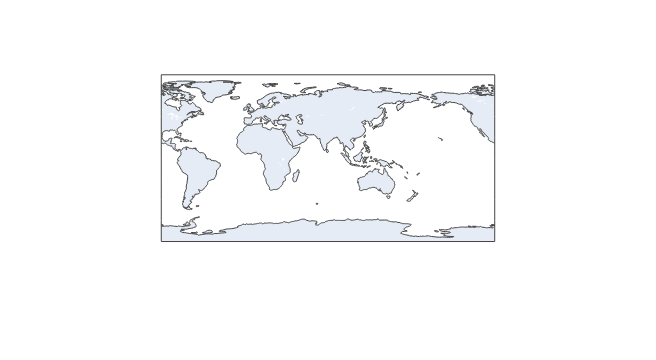

In [2]:
px.scatter_geo()

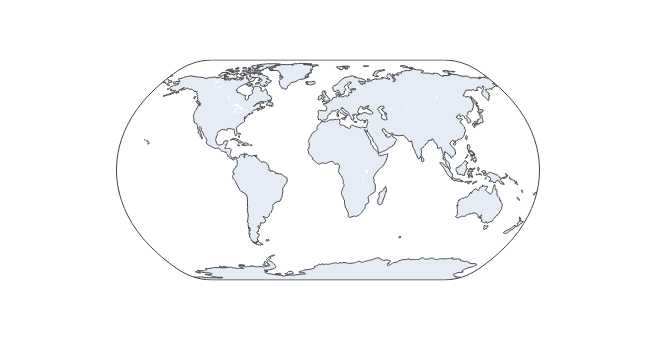

In [5]:
px.scatter_geo(projection='natural earth') #동그랗게

## 세계지도 + 버블

`-` 예시1

In [13]:
df = pd.DataFrame({'lat':[37,0], 'lon':[127,0], 'size':[100,5]})
df

lat  lon  size
0   37  127   100
1    0    0     5

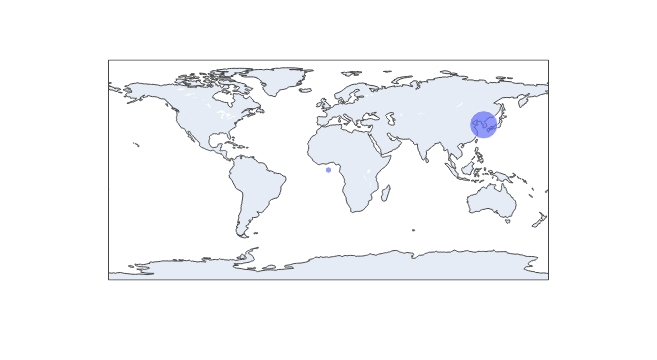

In [16]:
px.scatter_geo(
    data_frame=df,
    lat = 'lat',
    lon = 'lon',
    size = 'size'
)

`-` 예시2

In [22]:
df= pd.DataFrame({'code':['KOR','JPN'], 'size':[100,30]})
df

code  size
0  KOR   100
1  JPN    30

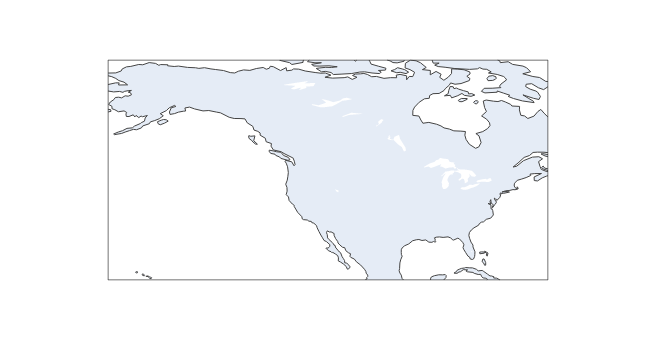

In [23]:
px.scatter_geo(
    data_frame = df,
    locations = 'code',
    size = 'size'
)

### Gapminder data 시각화

`-` Gapminder data: 국가별 기대수명, 1인당 GDP, 인구에 대한 데이터 

- 특징: 연도별로 정리가 되어있다.

In [25]:
df=px.data.gapminder()
df

country continent  year  lifeExp       pop   gdpPercap iso_alpha  \
0     Afghanistan      Asia  1952   28.801   8425333  779.445314       AFG   
1     Afghanistan      Asia  1957   30.332   9240934  820.853030       AFG   
2     Afghanistan      Asia  1962   31.997  10267083  853.100710       AFG   
3     Afghanistan      Asia  1967   34.020  11537966  836.197138       AFG   
4     Afghanistan      Asia  1972   36.088  13079460  739.981106       AFG   
...           ...       ...   ...      ...       ...         ...       ...   
1699     Zimbabwe    Africa  1987   62.351   9216418  706.157306       ZWE   
1700     Zimbabwe    Africa  1992   60.377  10704340  693.420786       ZWE   
1701     Zimbabwe    Africa  1997   46.809  11404948  792.449960       ZWE   
1702     Zimbabwe    Africa  2002   39.989  11926563  672.038623       ZWE   
1703     Zimbabwe    Africa  2007   43.487  12311143  469.709298       ZWE   

      iso_num  
0           4  
1           4  
2           4  
3           4  
4           4  
...       ...  
1699      716  
1700      716  
1701      716  
1702      716  
1703      716  

[1704 rows x 8 columns]

In [26]:
df.query('year==2007')

country continent  year  lifeExp       pop     gdpPercap  \
11           Afghanistan      Asia  2007   43.828  31889923    974.580338   
23               Albania    Europe  2007   76.423   3600523   5937.029526   
35               Algeria    Africa  2007   72.301  33333216   6223.367465   
47                Angola    Africa  2007   42.731  12420476   4797.231267   
59             Argentina  Americas  2007   75.320  40301927  12779.379640   
...                  ...       ...   ...      ...       ...           ...   
1655             Vietnam      Asia  2007   74.249  85262356   2441.576404   
1667  West Bank and Gaza      Asia  2007   73.422   4018332   3025.349798   
1679         Yemen, Rep.      Asia  2007   62.698  22211743   2280.769906   
1691              Zambia    Africa  2007   42.384  11746035   1271.211593   
1703            Zimbabwe    Africa  2007   43.487  12311143    469.709298   

     iso_alpha  iso_num  
11         AFG        4  
23         ALB        8  
35         DZA       12  
47         AGO       24  
59         ARG       32  
...        ...      ...  
1655       VNM      704  
1667       PSE      275  
1679       YEM      887  
1691       ZMB      894  
1703       ZWE      716  

[142 rows x 8 columns]

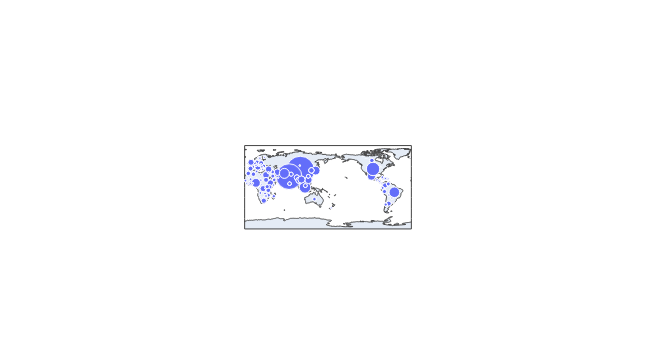

In [32]:
px.scatter_geo(
    data_frame = df,
    locations = 'iso_alpha',  
    size = 'pop'
)

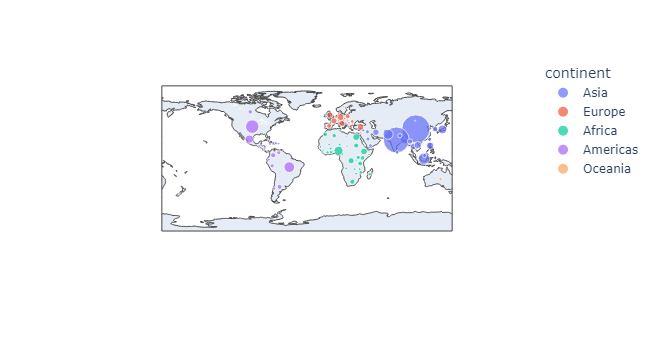

In [33]:
px.scatter_geo(
    data_frame = df.query('year==2007'),
    locations = 'iso_alpha',  
    size = 'pop',
    color = 'continent' # 국가
)

1. x,y 좌표 잡기
2. 크기
3. color
4. 시간 

.....

# px.scatter_geo + animation

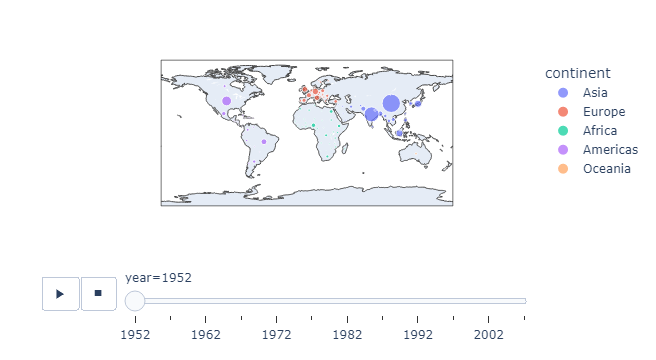

In [35]:
px.scatter_geo(
    data_frame = df,
    locations = 'iso_alpha',  
    size = 'pop',
    color = 'continent',
    animation_frame = 'year'
)

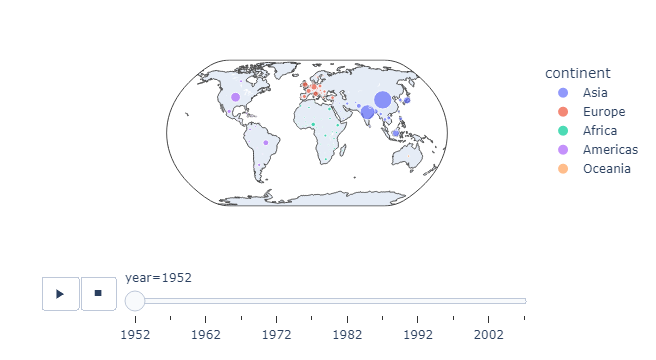

In [36]:
px.scatter_geo(
    data_frame = df,
    projection = 'natural earth',
    locations= 'iso_alpha',
    size='pop',
    color='continent',
    animation_frame='year'
)

- 코로플레스 맵